# Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy

# Statsmodels for VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Ensure inline plotting
%matplotlib inline

# Load Datasets

In [4]:
df = pd.read_csv('mba_decision_dataset.csv')

In [5]:
df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


*   Person ID – Unique identifier
*   Age – Age at the time of decision
*   Gender – Male, Female, Other
*   Undergraduate Major – Engineering, Business, Arts, Science, etc.
*   Undergraduate GPA – Scale from 0 to 4
*   Years of Work Experience – Years before MBA decision
*   Current Job Title – Analyst, Manager, Consultant, etc.
*   Annual Salary (Before MBA) – In USD
*   Has Management Experience – Yes/No
*   GRE/GMAT Score – Standardized test score
*   Undergrad University Ranking – Ranking of Bachelor's institution
*   Entrepreneurial Interest – Scale from 1 to 10
*   Networking Importance – Scale from 1 to 10
*   MBA Funding Source – Self-funded, Loan, Scholarship, Employer
*   Desired Post-MBA Role – Consultant, Executive, Startup Founder, etc.
*   Expected Post-MBA Salary – Expected salary after MBA
*   Location Preference (Post-MBA) – Domestic, International
*   Reason for MBA – Career Growth, Skill Enhancement, Entrepreneurship, etc.
*   Online vs. On-Campus MBA – Preference for learning mode
*   Decided to Pursue MBA? – Yes/No (Target Variable)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  int64  
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  object 
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

# Simple EDA

In [7]:
df.columns


Index(['Person ID', 'Age', 'Gender', 'Undergraduate Major',
       'Undergraduate GPA', 'Years of Work Experience', 'Current Job Title',
       'Annual Salary (Before MBA)', 'Has Management Experience',
       'GRE/GMAT Score', 'Undergrad University Ranking',
       'Entrepreneurial Interest', 'Networking Importance',
       'MBA Funding Source', 'Desired Post-MBA Role',
       'Expected Post-MBA Salary', 'Location Preference (Post-MBA)',
       'Reason for MBA', 'Online vs. On-Campus MBA', 'Decided to Pursue MBA?'],
      dtype='object')

## Statictical Descriptive

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Person ID,10000.0,5000.500000,2886.895680,1.0,2500.75,5000.50,7500.25,10000.0
Age,10000.0,27.494300,4.031823,21.0,24.00,27.00,31.00,34.0
Undergraduate GPA,10000.0,2.991611,0.573509,2.0,2.49,2.99,3.48,4.0
Years of Work Experience,10000.0,4.533500,2.861660,0.0,2.00,5.00,7.00,9.0
Annual Salary (Before MBA),10000.0,75166.406400,25850.070599,30013.0,52862.00,74829.50,97273.00,119966.0
GRE/GMAT Score,10000.0,524.446900,158.063760,250.0,390.00,524.00,661.00,799.0
Undergrad University Ranking,10000.0,247.036200,144.876240,1.0,121.00,243.00,373.00,499.0
Entrepreneurial Interest,10000.0,5.477830,2.585864,1.0,3.20,5.50,7.70,10.0
Networking Importance,10000.0,5.522170,2.588422,1.0,3.30,5.50,7.70,10.0
Expected Post-MBA Salary,10000.0,130321.228900,40598.421993,60001.0,95320.50,130155.50,165757.00,199999.0


In [9]:
df = df.drop(['Person ID'], axis= 1)

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Gender,10000,3,Male,5073
Undergraduate Major,10000,5,Economics,2082
Current Job Title,10000,5,Entrepreneur,2034
Has Management Experience,10000,2,No,6009
MBA Funding Source,10000,4,Employer,2538
Desired Post-MBA Role,10000,5,Executive,2041
Location Preference (Post-MBA),10000,2,International,5083
Reason for MBA,10000,4,Networking,2546
Online vs. On-Campus MBA,10000,2,On-Campus,5005
Decided to Pursue MBA?,10000,2,Yes,5907


## Univariate Analysis

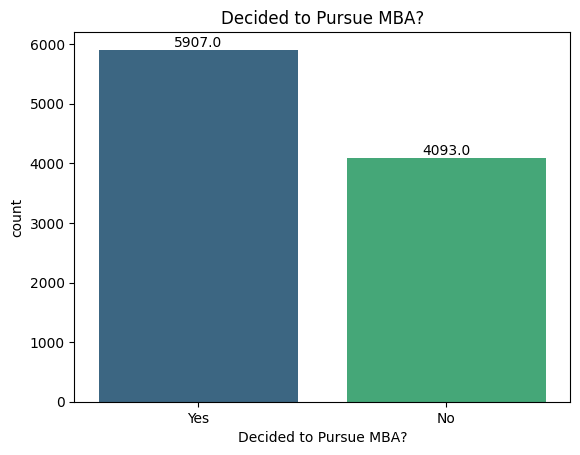

In [11]:
ax = sns.countplot(x='Decided to Pursue MBA?', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Decided to Pursue MBA?')
plt.show()

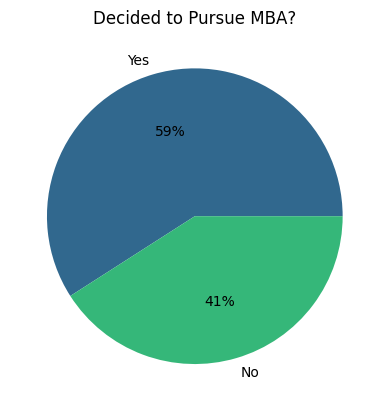

In [12]:
satisfaction_counts = df['Decided to Pursue MBA?'].value_counts()
colors = sns.color_palette('viridis', len(satisfaction_counts))

plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%.0f%%', colors=colors)

plt.title('Decided to Pursue MBA?')
plt.show()

In [13]:
num = df.select_dtypes(include = 'number').columns
cat = df.select_dtypes(include = 'object').columns

In [14]:
len(num)


9

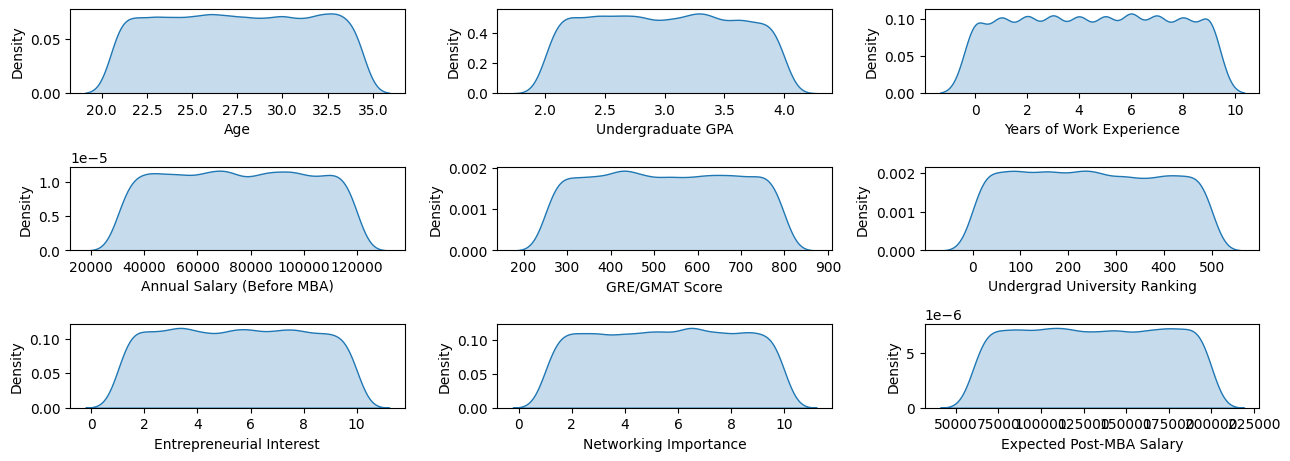

In [15]:
plt.figure(figsize=(13,9))
for i in range(0, len(num)):
    plt.subplot(6,3, i+1)
    sns.kdeplot(data=df, x=df[num[i]], fill='True')
    plt.tight_layout()

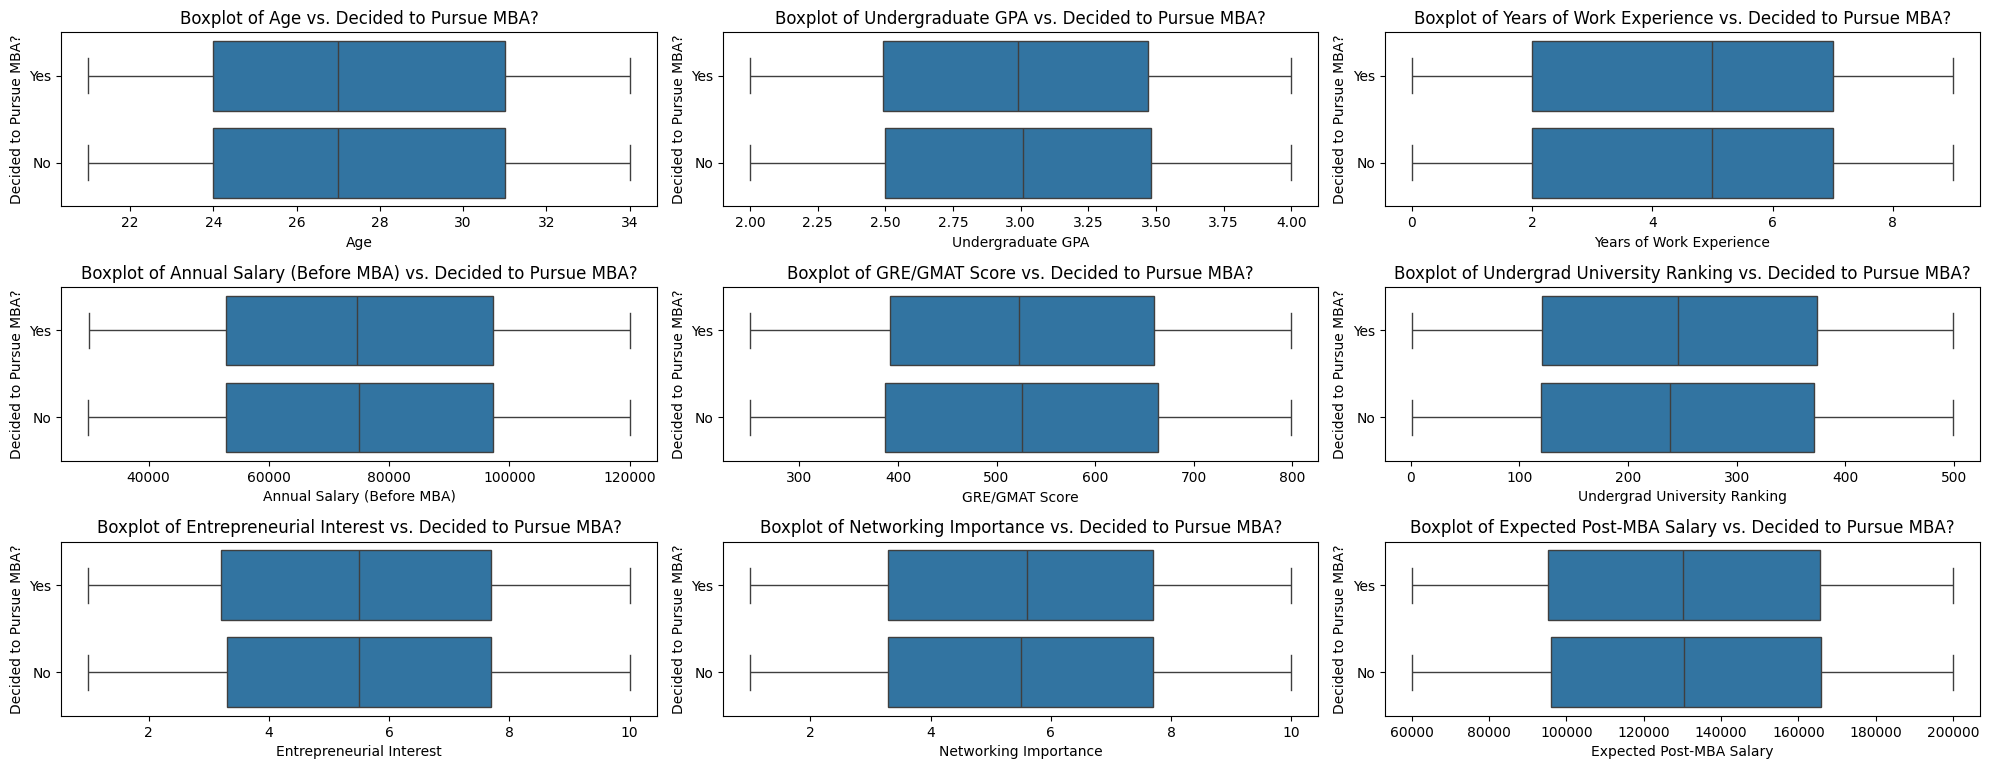

In [16]:
plt.figure(figsize=(20, 15))

for i in range(0, len(num)):
    plt.subplot(6, 3, i + 1)

    if df[num[i]].nunique() < 6 or df[num[i]].nunique() < 7:
        sns.countplot(x=df[num[i]], hue='Decided to Pursue MBA?', data=df,palette='viridis')
        plt.title(f'Countplot of {num[i]} vs. Decided to Pursue MBA?')
        plt.tight_layout()
    else:
        sns.boxplot(x=df[num[i]], y='Decided to Pursue MBA?', data=df)
        plt.title(f'Boxplot of {num[i]} vs. Decided to Pursue MBA?')
        plt.tight_layout()

plt.show()

## Multivariate Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Undergraduate GPA'),
  Text(2.5, 0, 'Years of Work Experience'),
  Text(3.5, 0, 'Annual Salary (Before MBA)'),
  Text(4.5, 0, 'GRE/GMAT Score'),
  Text(5.5, 0, 'Undergrad University Ranking'),
  Text(6.5, 0, 'Entrepreneurial Interest'),
  Text(7.5, 0, 'Networking Importance'),
  Text(8.5, 0, 'Expected Post-MBA Salary')])

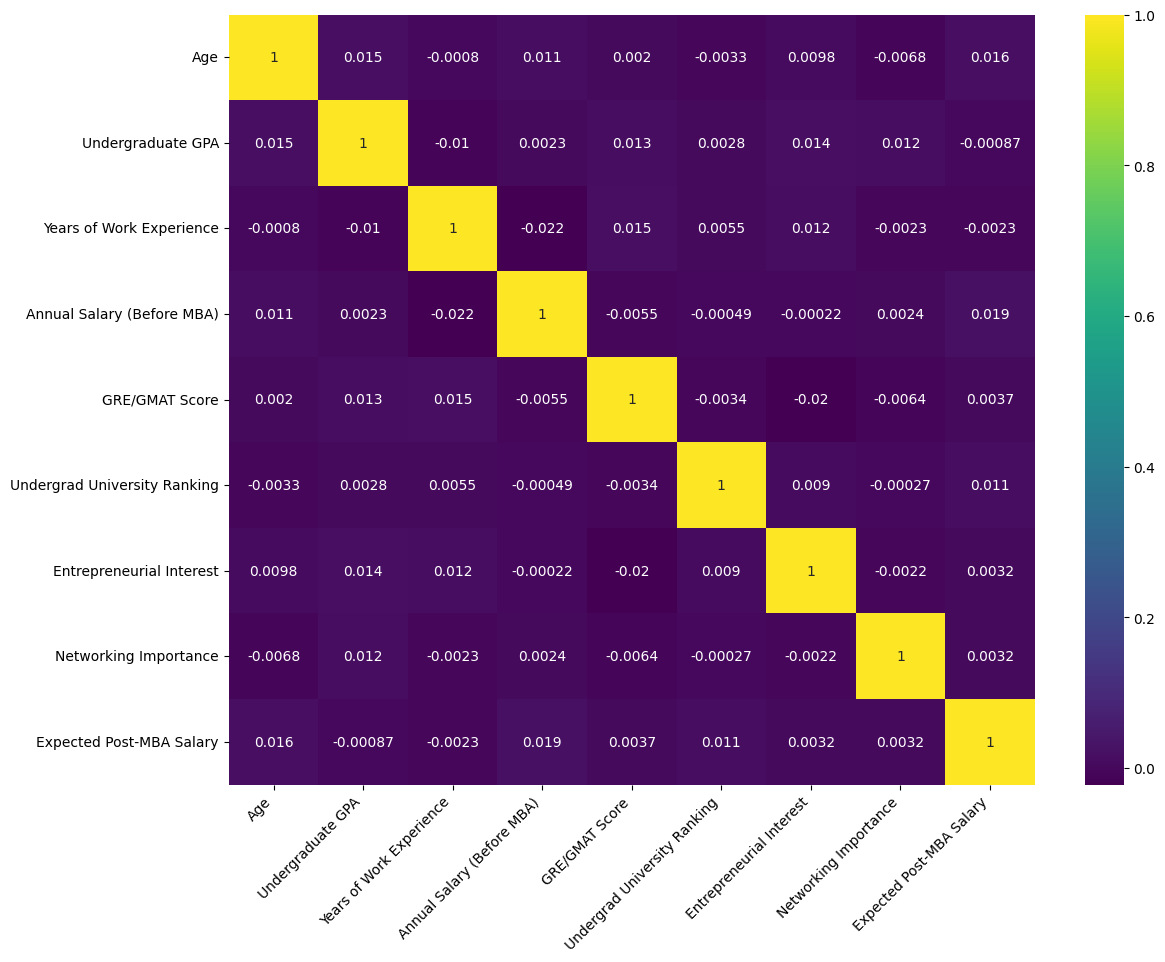

In [17]:
plt.figure(figsize=(13,10))
corr = df[num].corr()
sns.heatmap(corr, annot = True, cmap='viridis')
plt.xticks(rotation=45, ha='right')

## Outliers

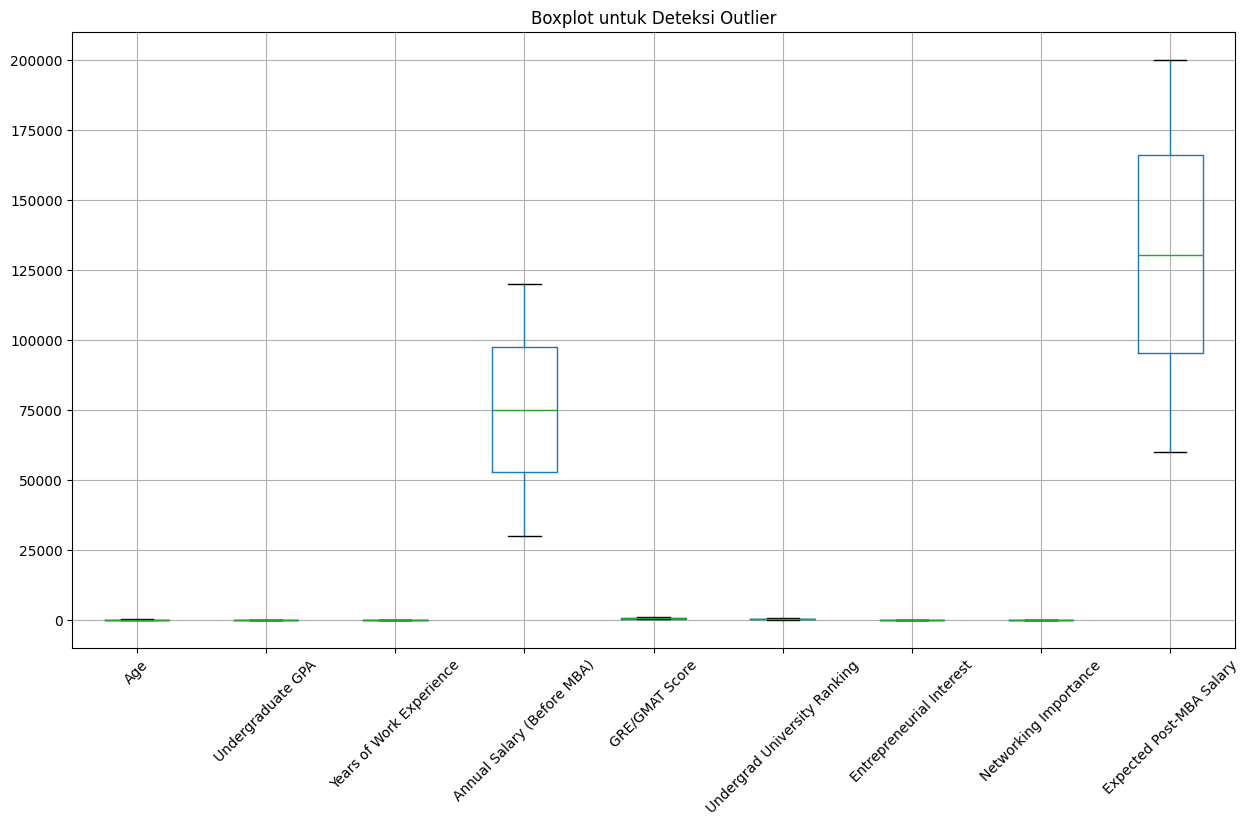

In [18]:
# Pilih hanya kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 8))
df[numeric_columns].boxplot(rot=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

## Distribusi Keputusan melanjutkan MBA

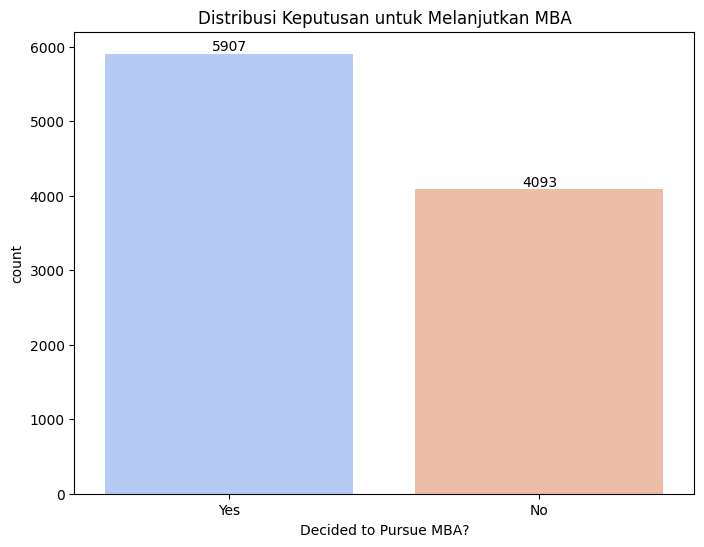

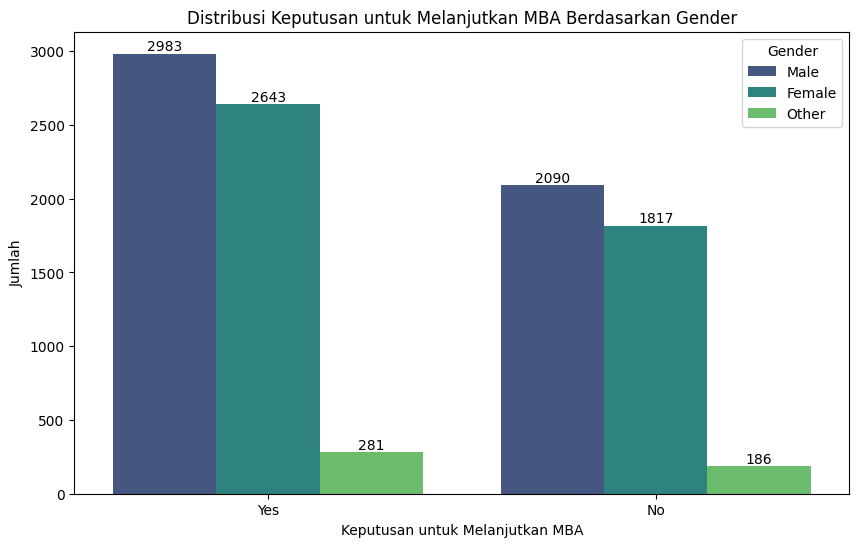

In [19]:
# Kolom kategorikal yang digunakan
categorical_columns = [
    'Gender',
    'Undergraduate Major',
    'Has Management Experience',
    'MBA Funding Source',
    'Reason for MBA',
    'Online vs. On-Campus MBA'
]

# Pilih data kategorikal yang tidak memiliki nilai NaN
train_categorical = df[categorical_columns + ['Decided to Pursue MBA?']].dropna()

# Fungsi untuk menambahkan anotasi pada bar plot
def add_annotations(ax):
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:
            ax.annotate(
                f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                fontsize=10,
                color='black',
                xytext=(0, 5),
                textcoords='offset points'
            )

# Visualisasi distribusi keputusan untuk melanjutkan MBA (menggunakan df)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Decided to Pursue MBA?', palette='coolwarm')
add_annotations(ax)
plt.title("Distribusi Keputusan untuk Melanjutkan MBA")
plt.show()

# Visualisasi distribusi keputusan melanjutkan MBA berdasarkan Gender (menggunakan df)
plt.figure(figsize=(10, 6))
ax_gender = sns.countplot(
    data=train_categorical,
    x='Decided to Pursue MBA?',
    hue='Gender',
    palette='viridis'
)
add_annotations(ax_gender)
plt.title("Distribusi Keputusan untuk Melanjutkan MBA Berdasarkan Gender")
plt.xlabel("Keputusan untuk Melanjutkan MBA")
plt.ylabel("Jumlah")
plt.legend(title="Gender")
plt.show()


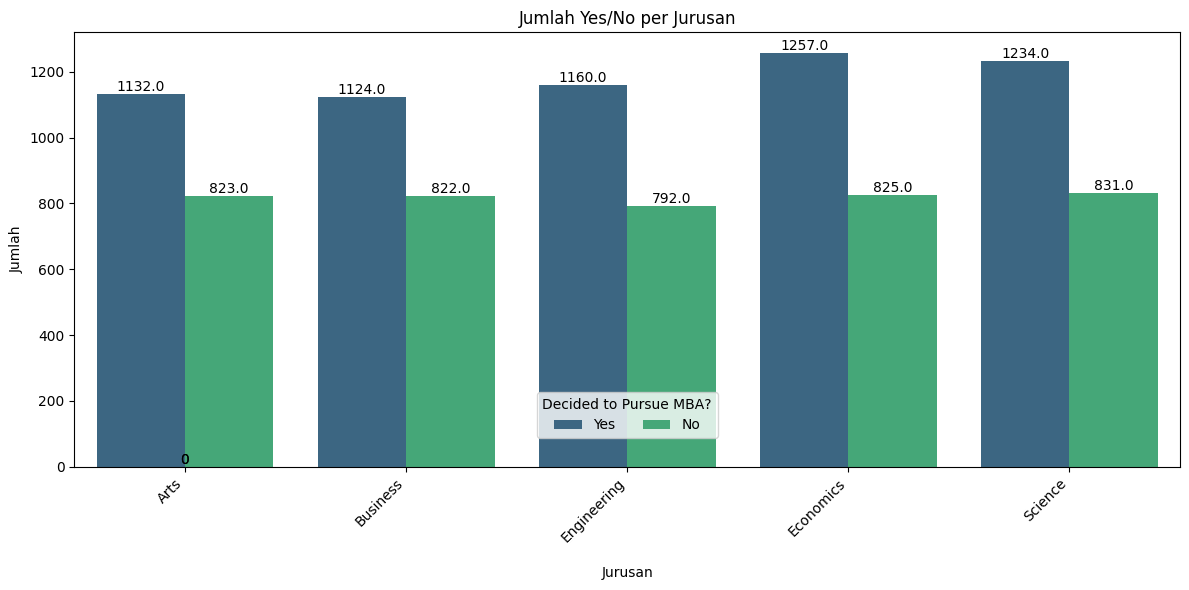

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Undergraduate Major' is the column with majors
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Undergraduate Major', hue='Decided to Pursue MBA?', data=df, palette='viridis')

plt.title('Jumlah Yes/No per Jurusan')
plt.xlabel('Jurusan', labelpad=15)
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')

# Menambahkan label jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Memindahkan legenda ke tengah bawah dalam plot
plt.legend(title='Decided to Pursue MBA?', loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=2, frameon=True)

plt.tight_layout()
plt.show()


# Split Datasets

In [21]:
df['Decided to Pursue MBA?'] = df['Decided to Pursue MBA?'].map({'No': 0, 'Yes': 1})

# Spliting datasets
X = df.drop('Decided to Pursue MBA?', axis = 1)
y = df['Decided to Pursue MBA?']

# Split data into train (70%), test (30%)
X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split train menjadi train (70%) dan validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.3, random_state=42)

# Menggabungkan kembali untuk encoding
train_new = pd.concat([X_train, y_train], axis=1)
test_new = pd.concat([X_test, y_test], axis=1)
val_new = pd.concat([X_val, y_val], axis=1)

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 6252 to 4705
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             3000 non-null   int64  
 1   Gender                          3000 non-null   object 
 2   Undergraduate Major             3000 non-null   object 
 3   Undergraduate GPA               3000 non-null   float64
 4   Years of Work Experience        3000 non-null   int64  
 5   Current Job Title               3000 non-null   object 
 6   Annual Salary (Before MBA)      3000 non-null   int64  
 7   Has Management Experience       3000 non-null   object 
 8   GRE/GMAT Score                  3000 non-null   int64  
 9   Undergrad University Ranking    3000 non-null   int64  
 10  Entrepreneurial Interest        3000 non-null   float64
 11  Networking Importance           3000 non-null   float64
 12  MBA Funding Source              3000

In [23]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 6252 to 4705
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             3000 non-null   int64  
 1   Gender                          3000 non-null   object 
 2   Undergraduate Major             3000 non-null   object 
 3   Undergraduate GPA               3000 non-null   float64
 4   Years of Work Experience        3000 non-null   int64  
 5   Current Job Title               3000 non-null   object 
 6   Annual Salary (Before MBA)      3000 non-null   int64  
 7   Has Management Experience       3000 non-null   object 
 8   GRE/GMAT Score                  3000 non-null   int64  
 9   Undergrad University Ranking    3000 non-null   int64  
 10  Entrepreneurial Interest        3000 non-null   float64
 11  Networking Importance           3000 non-null   float64
 12  MBA Funding Source              3000

# EDA

In [24]:
train_new.isna().sum()

,0
Age,0
Gender,0
Undergraduate Major,0
Undergraduate GPA,0
Years of Work Experience,0
Current Job Title,0
Annual Salary (Before MBA),0
Has Management Experience,0
GRE/GMAT Score,0
Undergrad University Ranking,0


In [25]:
train_new.duplicated().sum()

0

## Descriptive Analysis


In [26]:
train_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4900.0,27.496735,4.044833,21.0,24.00,28.00,31.00,34.0
Undergraduate GPA,4900.0,2.988559,0.575434,2.0,2.49,2.99,3.48,4.0
Years of Work Experience,4900.0,4.570204,2.859821,0.0,2.00,5.00,7.00,9.0
Annual Salary (Before MBA),4900.0,74734.969592,26081.991649,30037.0,51921.00,74398.50,97198.75,119960.0
GRE/GMAT Score,4900.0,525.444286,157.746591,250.0,391.75,524.00,665.25,799.0
Undergrad University Ranking,4900.0,246.991224,144.688522,1.0,120.00,243.00,373.00,499.0
Entrepreneurial Interest,4900.0,5.495571,2.584180,1.0,3.30,5.50,7.70,10.0
Networking Importance,4900.0,5.536184,2.576129,1.0,3.30,5.60,7.70,10.0
Expected Post-MBA Salary,4900.0,130268.544286,40325.645831,60001.0,95918.00,129741.50,165580.50,199998.0
Decided to Pursue MBA?,4900.0,0.594898,0.490962,0.0,0.00,1.00,1.00,1.0


In [27]:
train_new.describe(include='object').T

,count,unique,top,freq
Gender,4900,3,Male,2525
Undergraduate Major,4900,5,Science,1034
Current Job Title,4900,5,Entrepreneur,1004
Has Management Experience,4900,2,No,2946
MBA Funding Source,4900,4,Self-funded,1258
Desired Post-MBA Role,4900,5,Executive,1018
Location Preference (Post-MBA),4900,2,International,2468
Reason for MBA,4900,4,Networking,1274
Online vs. On-Campus MBA,4900,2,On-Campus,2492


## Bivariate analysis

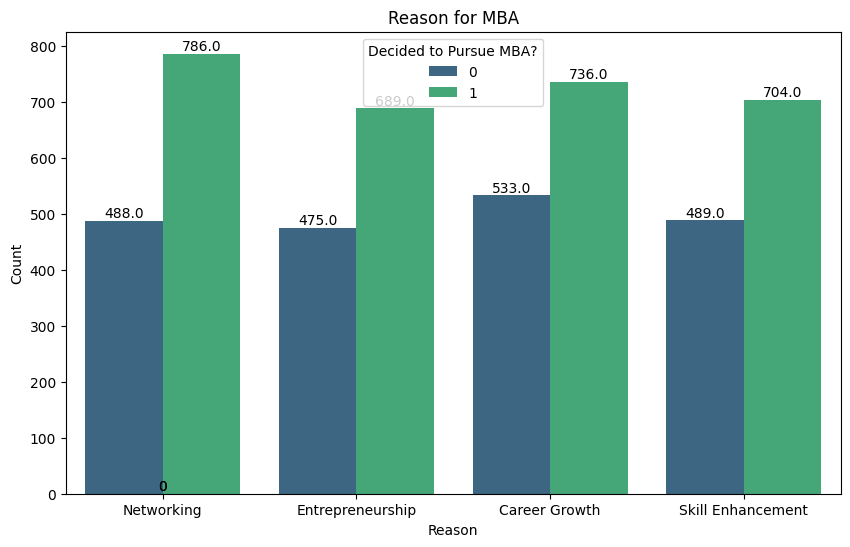

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason for MBA', hue='Decided to Pursue MBA?', data=train_new, palette='viridis')
plt.title('Reason for MBA')
plt.xlabel('Reason')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

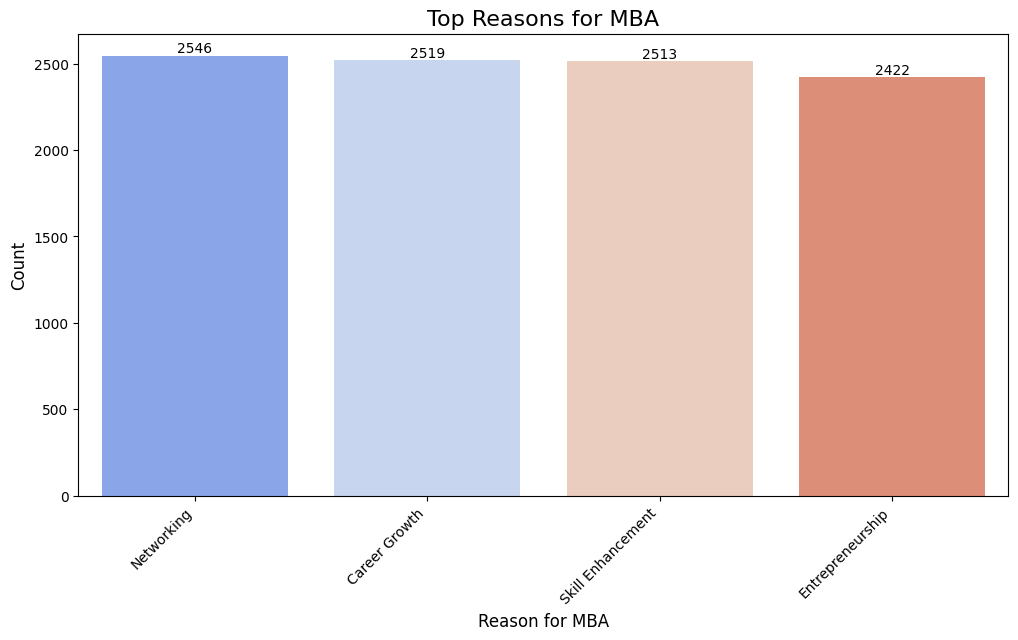

In [29]:
# tOP REASON MBA
plt.figure(figsize=(12, 6))
reason_counts = df['Reason for MBA'].value_counts()
sns_bar = sns.barplot(x=reason_counts.index, y=reason_counts.values, palette="coolwarm")

for index, value in enumerate(reason_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Top Reasons for MBA", fontsize=16)
plt.xlabel("Reason for MBA", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


Text(0.5, 1.0, 'Distribusi Keputusan untuk Mengejar MBA')

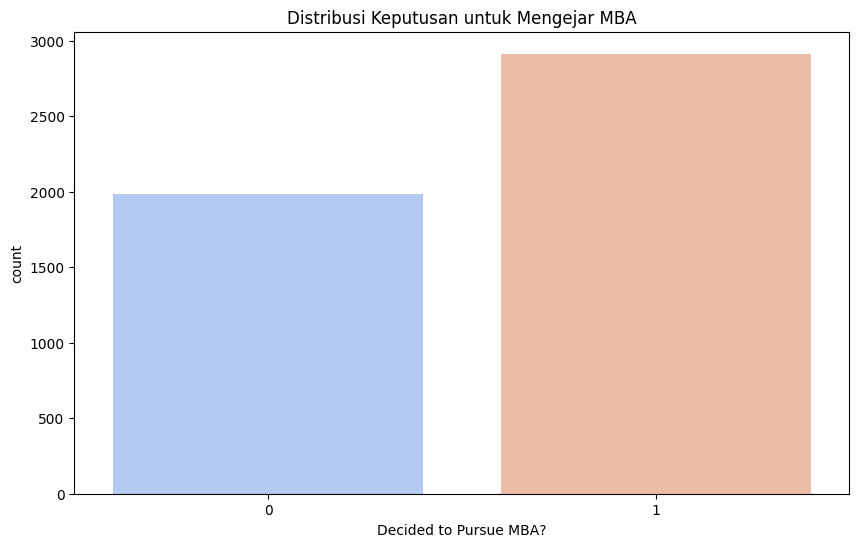

In [30]:
# 1. Distribusi variabel target (Decided to Pursue MBA?)
plt.figure(figsize=(10, 6))
sns.countplot(x=train_new["Decided to Pursue MBA?"], palette="coolwarm")
plt.title("Distribusi Keputusan untuk Mengejar MBA")

Text(0.5, 1.0, 'Distribusi Gaji Sebelum MBA berdasarkan Keputusan MBA')

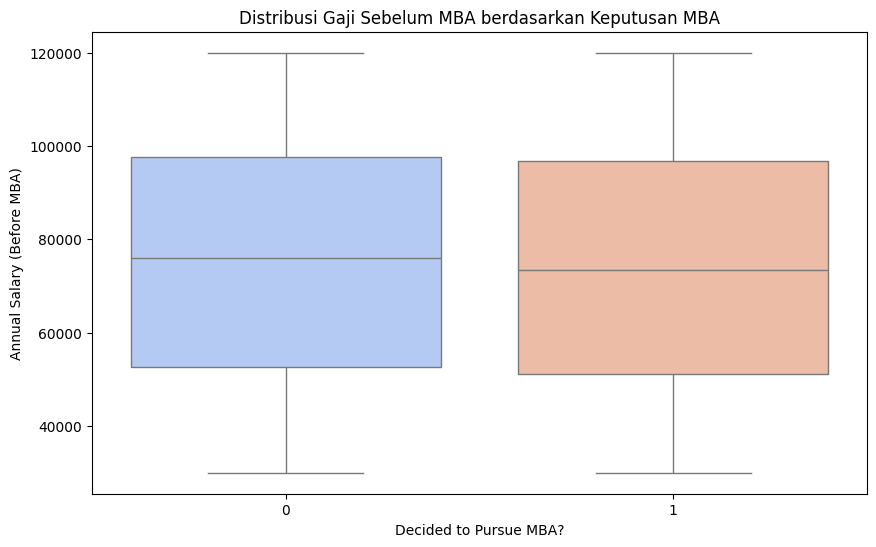

In [31]:
# 2. Boxplot Annual Salary (Before MBA) vs. Decided to Pursue MBA?
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_new["Decided to Pursue MBA?"], y=train_new["Annual Salary (Before MBA)"], palette="coolwarm")
plt.title("Distribusi Gaji Sebelum MBA berdasarkan Keputusan MBA")

Text(0.5, 1.0, 'Pengaruh Pengalaman Manajemen terhadap Keputusan MBA')

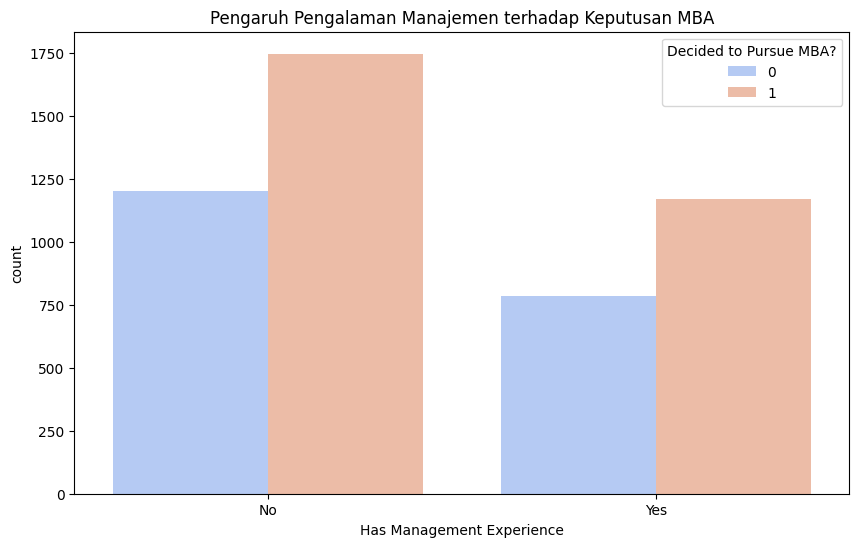

In [32]:
# 4. Perbandingan fitur kategori (Has Management Experience) terhadap keputusan MBA
plt.figure(figsize=(10, 6))
sns.countplot(x=train_new["Has Management Experience"], hue=train_new["Decided to Pursue MBA?"], palette="coolwarm")
plt.title("Pengaruh Pengalaman Manajemen terhadap Keputusan MBA")

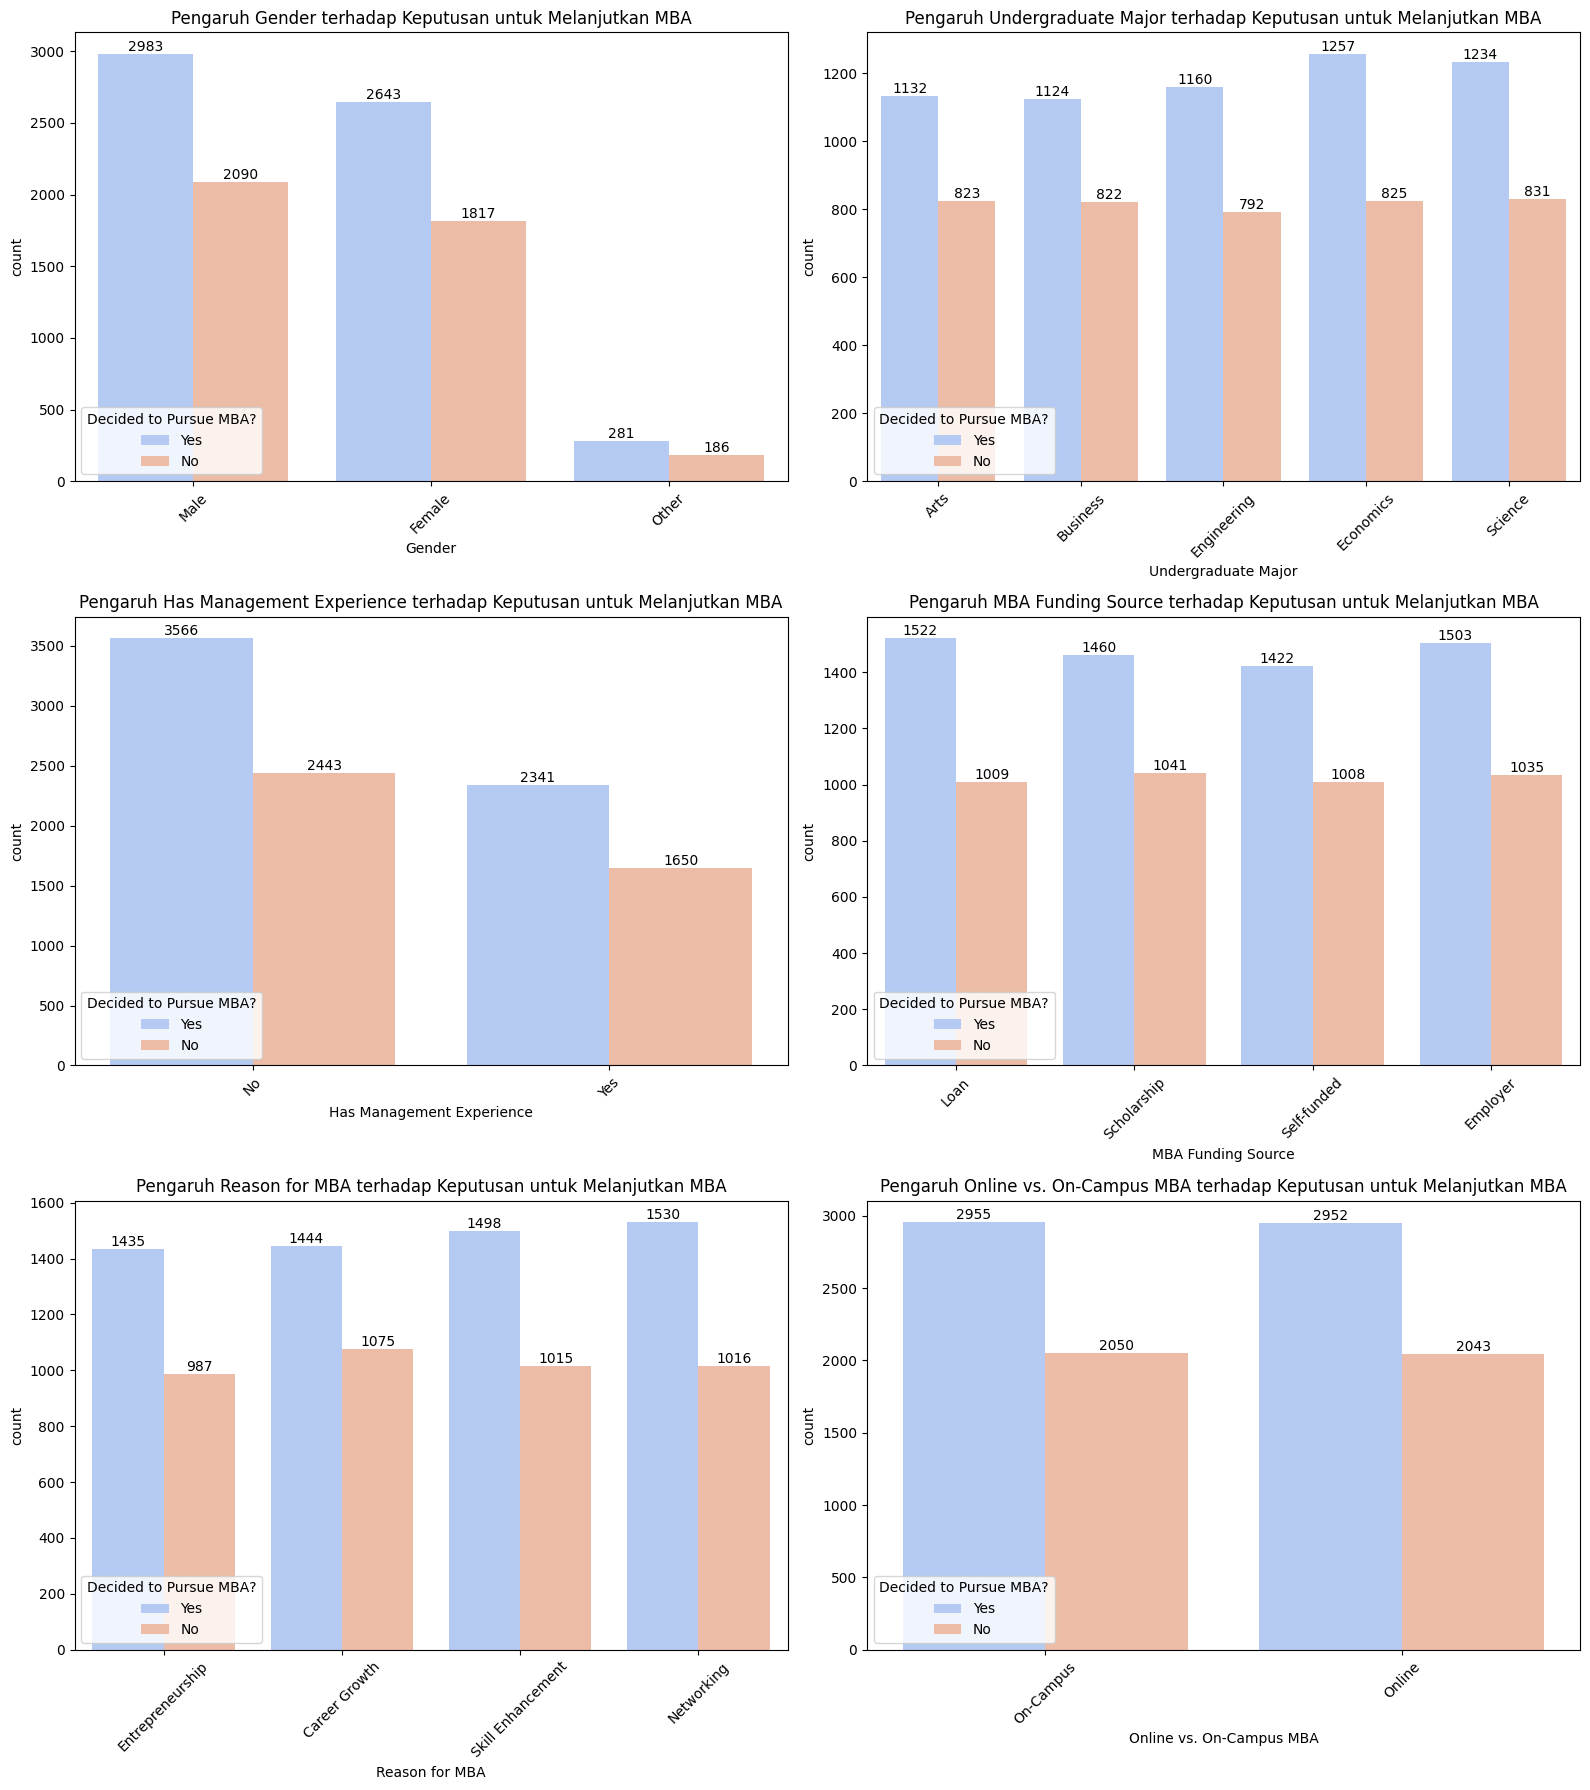

In [33]:
# Visualisasi pengaruh setiap kategori terhadap keputusan (2 baris per output, x-axis sesuai isi kolom)
fig, axes = plt.subplots(nrows=(len(categorical_columns) + 1) // 2, ncols=2, figsize=(16, len(categorical_columns) * 3))

axes = axes.flatten()  # Meratakan array axes untuk iterasi
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=train_categorical, x=col, hue='Decided to Pursue MBA?', palette='coolwarm', ax=ax)
    add_annotations(ax)
    ax.set_title(f"Pengaruh {col} terhadap Keputusan untuk Melanjutkan MBA")
    ax.set_xlabel(col)  # Mengatur label sumbu-x sesuai kolom
    ax.set_xticklabels(train_categorical[col].unique(), rotation=45)  # Menampilkan isi unik dari kolom
    ax.legend(title="Decided to Pursue MBA?", loc='lower left')

# Hapus axes kosong jika jumlah grafik kurang dari jumlah subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Korelasi

Text(0.5, 1.0, 'Heatmap Korelasi Fitur Numerik')

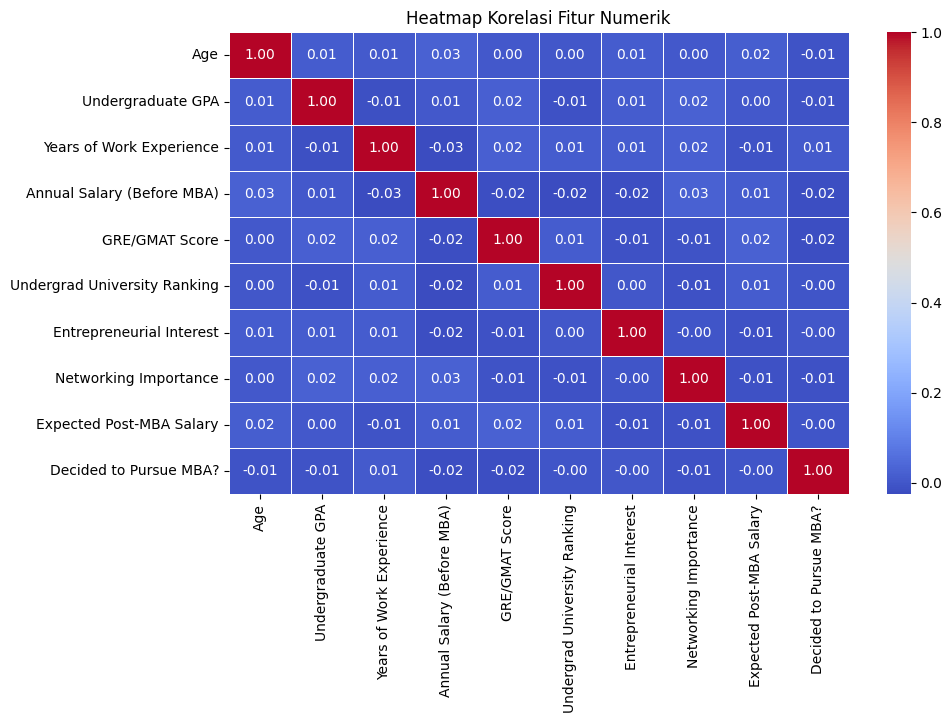

In [34]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
corr_matrix = train_new.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")

<Axes: >

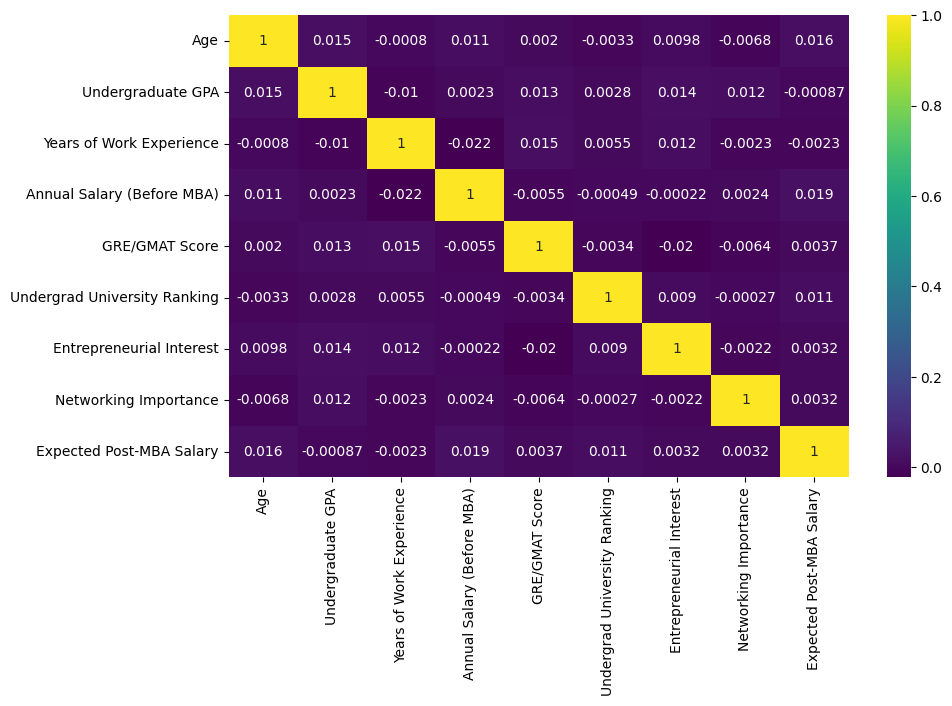

In [35]:
plt.figure(figsize=(10,6))
corr1 = X_train[num].corr()
sns.heatmap(corr, annot = True, cmap='viridis')

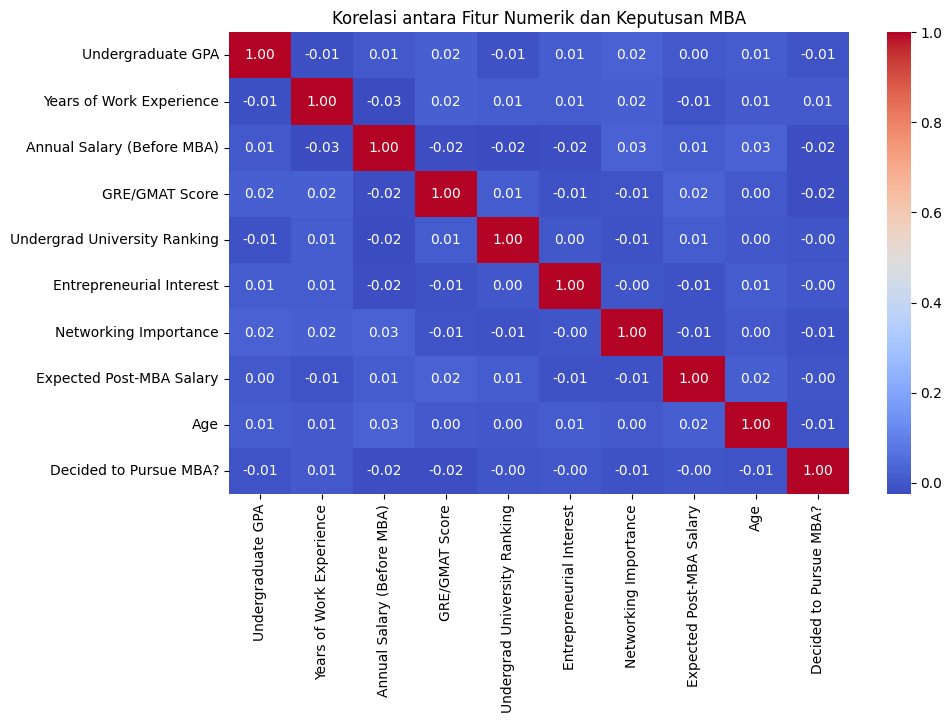

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = [
    "Undergraduate GPA", "Years of Work Experience", "Annual Salary (Before MBA)",
    "GRE/GMAT Score", "Undergrad University Ranking", "Entrepreneurial Interest",
    "Networking Importance", "Expected Post-MBA Salary", "Age"
]

correlation = train_new[numerical_features + ["Decided to Pursue MBA?"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Fitur Numerik dan Keputusan MBA")
plt.show()

## Top Higest and Lowest Korelasi

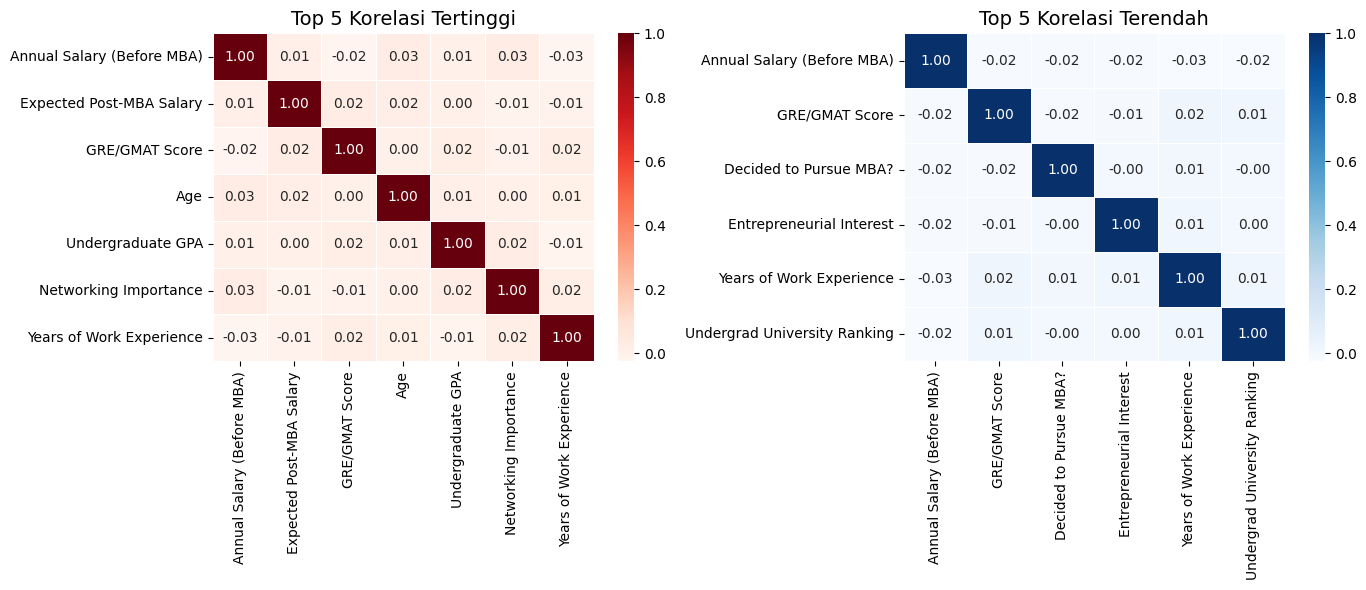

In [37]:
# Menghitung korelasi hanya untuk kolom numerik
correlation_matrix = train_new.select_dtypes(include=['int64', 'float64']).corr()

# Mengambil korelasi dalam bentuk long format
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]

# Menghapus duplikat pasangan korelasi
corr_pairs['sorted_vars'] = corr_pairs.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset=['sorted_vars']).drop(columns=['sorted_vars'])

# Mendapatkan 5 korelasi tertinggi dan 5 korelasi terendah
top_5_highest = corr_pairs.nlargest(5, 'Correlation')
top_5_lowest = corr_pairs.nsmallest(5, 'Correlation')

# Membuat subset untuk top 5 korelasi tertinggi dan terendah
top_high_vars = list(set(top_5_highest["Variable 1"]).union(set(top_5_highest["Variable 2"])))
top_low_vars = list(set(top_5_lowest["Variable 1"]).union(set(top_5_lowest["Variable 2"])))

# Filter matriks korelasi hanya untuk variabel yang relevan
high_corr_matrix = correlation_matrix.loc[top_high_vars, top_high_vars]
low_corr_matrix = correlation_matrix.loc[top_low_vars, top_low_vars]

# Membuat heatmap untuk korelasi tertinggi dan terendah
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5, ax=axes[0])
axes[0].set_title("Top 5 Korelasi Tertinggi", fontsize=14)

sns.heatmap(low_corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, ax=axes[1])
axes[1].set_title("Top 5 Korelasi Terendah", fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### **Kesimpulan Analisis Korelasi**

### **Top 5 Korelasi Tertinggi**
1. **Undergraduate GPA memiliki korelasi tinggi dengan GRE/GMAT Score**  
   - Ini menunjukkan bahwa mahasiswa dengan GPA tinggi cenderung memiliki skor GRE/GMAT yang lebih baik.
  
2. **Expected Post-MBA Salary memiliki korelasi dengan Annual Salary (Before MBA)**  
   - Gaji setelah MBA yang diharapkan memiliki hubungan dengan gaji sebelum MBA, yang masuk akal karena mereka yang sudah memiliki gaji tinggi kemungkinan memiliki ekspektasi lebih tinggi setelah lulus MBA.

3. **Networking Importance memiliki korelasi dengan faktor lainnya**  
   - Pentingnya networking memiliki korelasi dengan berbagai faktor, kemungkinan karena mahasiswa yang aktif dalam networking lebih cenderung memiliki ekspektasi tinggi terhadap prospek MBA.

4. **Years of Work Experience memiliki korelasi dengan Age**  
   - Seiring bertambahnya usia, jumlah pengalaman kerja seseorang juga meningkat, yang merupakan hubungan yang logis.

5. **GRE/GMAT Score memiliki korelasi dengan beberapa faktor lain**  
   - Skor GRE/GMAT menunjukkan sedikit hubungan dengan faktor lain seperti GPA dan gaji sebelum MBA.

### **Top 5 Korelasi Terendah**
1. **Decided to Pursue MBA memiliki korelasi rendah dengan faktor lainnya**  
   - Keputusan untuk mengejar MBA tampaknya tidak terlalu dipengaruhi oleh faktor seperti GRE/GMAT Score atau Gaji sebelum MBA.
  
2. **Entrepreneurial Interest memiliki korelasi rendah dengan banyak variabel lain**  
   - Minat berwirausaha tidak banyak berkaitan dengan faktor seperti pengalaman kerja atau GPA.

3. **Undergrad University Ranking memiliki korelasi sangat rendah dengan faktor lainnya**  
   - Peringkat universitas sarjana tampaknya tidak memiliki dampak yang signifikan terhadap faktor lain seperti gaji atau pengalaman kerja.

4. **Annual Salary (Before MBA) memiliki korelasi lemah dengan Years of Work Experience**  
   - Gaji sebelum MBA tidak berkorelasi kuat dengan jumlah tahun pengalaman kerja, yang mungkin menunjukkan bahwa pengalaman kerja bukan satu-satunya faktor yang menentukan gaji.

5. **GRE/GMAT Score memiliki korelasi rendah dengan banyak faktor lain**  
   - Meskipun penting dalam proses penerimaan, skor ini tampaknya tidak berpengaruh signifikan pada keputusan untuk mengejar MBA atau ekspektasi gaji pasca-MBA.

### **Kesimpulan Umum**
- Beberapa faktor akademik seperti **GPA dan GRE/GMAT Score** memiliki korelasi yang cukup tinggi satu sama lain.
- **Gaji sebelum MBA dan gaji yang diharapkan setelah MBA** memiliki hubungan yang wajar.
- Faktor-faktor seperti **minat berwirausaha, keputusan mengejar MBA, dan peringkat universitas** memiliki korelasi yang rendah dengan variabel lainnya.
- **Pengalaman kerja berkorelasi dengan usia**, yang sesuai dengan ekspektasi logis.


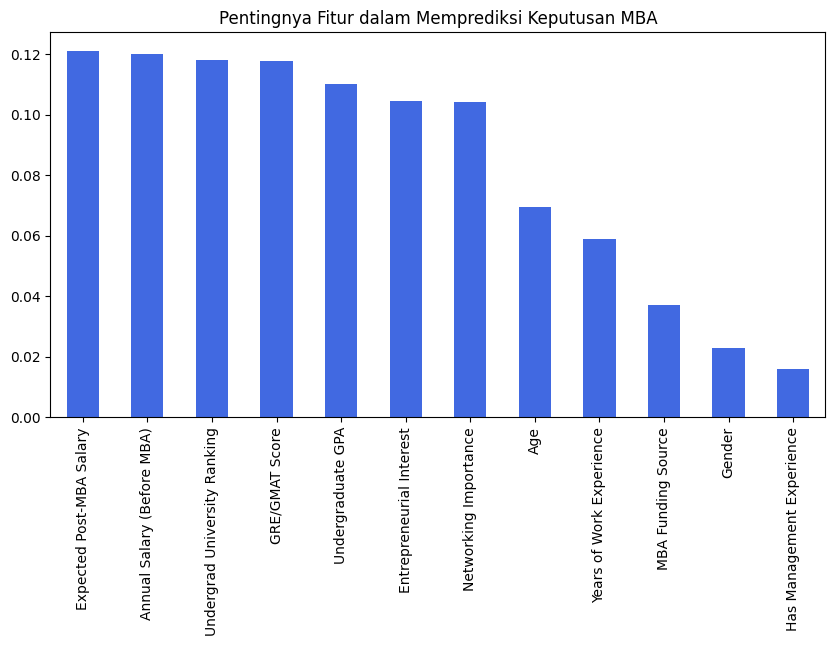

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

categorical_features = ["Has Management Experience", "Gender", "MBA Funding Source"]

# Encode variabel kategorikal
df_encoded = df.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Pilih fitur
X = df_encoded[numerical_features + categorical_features]
y = df_encoded["Decided to Pursue MBA?"]

# Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot kepentingan fitur
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind="bar", figsize=(10, 5), color="royalblue")
plt.title("Pentingnya Fitur dalam Memprediksi Keputusan MBA")
plt.show()


In [39]:
# from sklearn.inspection import permutation_importance

# # Menghitung permutation importance
# perm_importance = permutation_importance(rf, X_test, y_test, scoring="accuracy", random_state=42)

# # Menyusun hasil dalam DataFrame
# perm_importance_df = pd.DataFrame({
#     "Feature": X.columns,
#     "Importance": perm_importance.importances_mean
# }).sort_values(by="Importance", ascending=False)

# # Menampilkan 10 fitur teratas
# perm_importance_df.head(10)

##### 1. Faktor Finansial Sangat Berpengaruh  
- **Expected Post-MBA Salary** dan **Annual Salary (Before MBA)** adalah dua fitur terpenting dalam memprediksi keputusan untuk melanjutkan MBA.  
- Ini menunjukkan bahwa calon mahasiswa MBA sangat mempertimbangkan manfaat finansial setelah lulus dibandingkan dengan kondisi keuangan mereka sebelum mengambil MBA.  

##### 2. Reputasi Akademik dan Kemampuan Akademik Berperan Besar  
- **Undergrad University Ranking**, **GRE/GMAT Score**, dan **Undergraduate GPA** memiliki pengaruh yang cukup tinggi.  
- Ini menandakan bahwa individu dengan latar belakang akademik yang kuat lebih mungkin mempertimbangkan MBA sebagai pilihan karier mereka.  

##### 3. Minat dan Jaringan Profesional Berpengaruh  
- **Entrepreneurial Interest** dan **Networking Importance** juga menjadi faktor yang signifikan.  
- Ini menunjukkan bahwa calon mahasiswa MBA mempertimbangkan bagaimana program MBA dapat membantu mereka dalam membangun jaringan profesional dan mendukung minat kewirausahaan mereka.  

##### 4. Faktor Demografi dan Pengalaman Kerja Memiliki Pengaruh Sedang  
- **Age** dan **Years of Work Experience** memiliki pengaruh yang lebih rendah dibandingkan faktor finansial dan akademik, tetapi tetap relevan.  
- Ini menunjukkan bahwa keputusan untuk melanjutkan MBA tidak hanya dipengaruhi oleh usia, tetapi juga pengalaman profesional yang sudah dimiliki.  

##### 5. Faktor Gender dan Pengalaman Manajerial Kurang Berpengaruh  
- **Gender** dan **Has Management Experience** memiliki pengaruh yang paling kecil dalam model prediksi.  
- Ini bisa mengindikasikan bahwa keputusan untuk mengambil MBA lebih banyak dipengaruhi oleh faktor ekonomi, akademik, dan aspirasi pribadi dibandingkan dengan faktor demografi atau pengalaman spesifik dalam manajemen.  

##### **Kesimpulan**  
Keputusan untuk melanjutkan MBA lebih banyak dipengaruhi oleh faktor ekonomi dan akademik dibandingkan faktor demografi atau pengalaman kerja.  
Calon mahasiswa cenderung mempertimbangkan potensi peningkatan gaji setelah MBA, reputasi akademik, dan peluang networking sebagai faktor utama sebelum mengambil keputusan.  


### Insight dan Kesimpulan dari Grafik Pentingnya Fitur dalam Memprediksi Keputusan MBA  


## Persebaran Undergraduate GPA

Text(0, 0.5, 'Frekuensi')

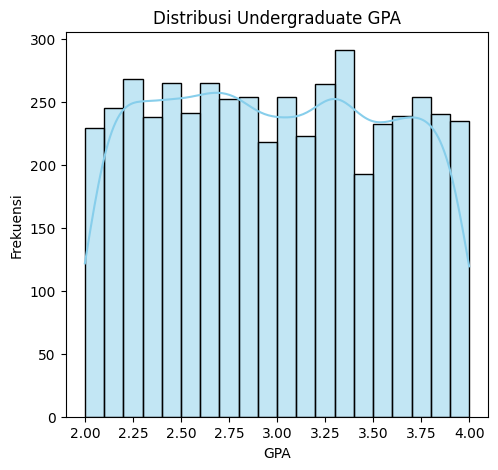

In [40]:
# Membuat visualisasi
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_new['Undergraduate GPA'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Undergraduate GPA')
plt.xlabel('GPA')
plt.ylabel('Frekuensi')

In [41]:
train_new['Undergraduate GPA'].value_counts()

,count
Undergraduate GPA,
3.00,39
2.15,38
3.79,37
2.43,37
2.56,35
...,...
2.98,15
3.86,13
4.00,13


## Persebaran Age

Text(0, 0.5, 'Frekuensi')

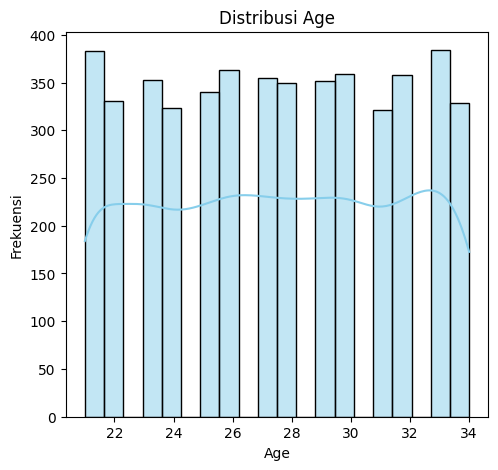

In [42]:
# Membuat visualisasi
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_new['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

In [43]:
train_new['Age'].value_counts()

,count
Age,
33,384
21,383
26,363
30,359
32,358
27,355
23,353
29,352
28,349


# Preprocessing Data

In [44]:
train_new

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
8063,32,Other,Business,2.84,6,Analyst,112872,No,567,124,8.3,6.0,Employer,Executive,106844,Domestic,Networking,Online,0
5667,29,Other,Business,3.31,5,Analyst,83461,No,360,89,2.0,6.9,Employer,Startup Founder,174496,Domestic,Entrepreneurship,Online,0
6637,27,Female,Arts,2.75,3,Entrepreneur,60977,Yes,450,427,7.2,9.2,Self-funded,Finance Manager,143516,International,Entrepreneurship,On-Campus,0
7977,30,Female,Arts,2.01,6,Engineer,34838,Yes,581,239,2.7,2.6,Self-funded,Marketing Director,136549,Domestic,Entrepreneurship,On-Campus,0
8216,34,Female,Economics,3.60,1,Engineer,46891,No,688,160,2.0,1.6,Employer,Executive,138883,International,Entrepreneurship,Online,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,22,Female,Arts,3.82,4,Entrepreneur,49512,No,341,444,6.0,3.5,Loan,Finance Manager,149100,International,Career Growth,Online,0
632,21,Female,Arts,2.83,0,Analyst,78615,No,586,330,8.2,2.8,Loan,Consultant,177315,International,Networking,Online,1
2349,31,Male,Engineering,2.98,5,Engineer,87551,Yes,715,346,8.2,7.0,Loan,Executive,78372,Domestic,Skill Enhancement,Online,1
4293,24,Female,Business,3.46,5,Manager,53518,Yes,566,487,8.2,8.8,Scholarship,Marketing Director,117012,International,Career Growth,On-Campus,0


In [45]:
df['Expected Post-MBA Salary'].min()

60001

# Feature Enginering

In [46]:
# AGE Group
train_new['Age_Group'] = pd.cut(train_new['Age'],
                                bins=[20, 30, 40, 50, 60],
                                labels=['20-30', '30-40', '40-50', '50-60'])
test_new['Age_Group'] = pd.cut(test_new['Age'],
                               bins=[20, 30, 40, 50, 60],
                               labels=['20-30', '30-40', '40-50', '50-60'])
val_new['Age_Group'] = pd.cut(val_new['Age'],
                              bins=[20, 30, 40, 50, 60],
                              labels=['20-30', '30-40', '40-50', '50-60'])

# Drop the 'Age' column
train_new = train_new.drop('Age', axis=1)
test_new = test_new.drop('Age', axis=1)
val_new = val_new.drop('Age', axis=1)

In [47]:
# GPA Category
train_new['GPA_Category'] = pd.cut(train_new['Undergraduate GPA'],
                                   bins=[0, 2.5, 3.5, float('inf')],
                                   labels=['Low', 'Medium', 'High'])
test_new['GPA_Category'] = pd.cut(test_new['Undergraduate GPA'],
                                   bins=[0, 2.5, 3.5, float('inf')],
                                   labels=['Low', 'Medium', 'High'])
val_new['GPA_Category'] = pd.cut(val_new['Undergraduate GPA'],
                                   bins=[0, 2.5, 3.5, float('inf')],
                                   labels=['Low', 'Medium', 'High'])


# train_new = train_new.drop(['Undergraduate GPA'],axis=1)
# test_new = test_new.drop(['Undergraduate GPA'],axis=1)
# val_new = val_new.drop(['Undergraduate GPA'],axis=1)


In [48]:
train_new['Undergraduate GPA']


,Undergraduate GPA
8063,2.84
5667,3.31
6637,2.75
7977,2.01
8216,3.60
...,...
5598,3.82
632,2.83
2349,2.98
4293,3.46


In [49]:
train_new['Undergraduate GPA'].value_counts()


,count
Undergraduate GPA,
3.00,39
2.15,38
3.79,37
2.43,37
2.56,35
...,...
2.98,15
3.86,13
4.00,13


In [50]:
train_new['GPA_Category'].value_counts()


,count
GPA_Category,
Medium,2464
Low,1262
High,1174


In [51]:
X_train_selected['GPA_Category'].value_counts()

NameError: name 'X_train_selected' is not defined

In [ ]:
train_new['GPA_Category'].value_counts()


In [ ]:
train_new['GPA_Category']

In [ ]:
# GRE / GMAT
train_new['GRE_Score_Group'] = pd.cut(train_new['GRE/GMAT Score'],
                                      bins=[250, 400, 600, 800, 1000],
                                      labels=['250-400', '400-600', '600-800', '800-1000'])
test_new['GRE_Score_Group'] = pd.cut(test_new['GRE/GMAT Score'],
                                     bins=[250, 400, 600, 800, 1000],
                                     labels=['250-400', '400-600', '600-800', '800-1000'])
val_new['GRE_Score_Group'] = pd.cut(val_new['GRE/GMAT Score'],
                                    bins=[250, 400, 600, 800, 1000],
                                    labels=['250-400', '400-600', '600-800', '800-1000'])


In [ ]:
# Universtias Ranking
train_new['Uni_Ranking_Group'] = pd.cut(train_new['Undergrad University Ranking'],
                                        bins=[0, 50, 150, 300, 500],
                                        labels=['Top 50', '50-150', '150-300', '300-500'])
test_new['Uni_Ranking_Group'] = pd.cut(test_new['Undergrad University Ranking'],
                                       bins=[0, 50, 150, 300, 500],
                                       labels=['Top 50', '50-150', '150-300', '300-500'])
val_new['Uni_Ranking_Group'] = pd.cut(val_new['Undergrad University Ranking'],
                                      bins=[0, 50, 150, 300, 500],
                                      labels=['Top 50', '50-150', '150-300', '300-500'])


In [ ]:
# Entrepretur Interreste
train_new['Entrepreneurial_Interest_Group'] = pd.cut(train_new['Entrepreneurial Interest'],
                                                     bins=[0, 3, 5, 7, 10],
                                                     labels=['Low', 'Medium', 'High', 'Very High'])
test_new['Entrepreneurial_Interest_Group'] = pd.cut(test_new['Entrepreneurial Interest'],
                                                    bins=[0, 3, 5, 7, 10],
                                                    labels=['Low', 'Medium', 'High', 'Very High'])
val_new['Entrepreneurial_Interest_Group'] = pd.cut(val_new['Entrepreneurial Interest'],
                                                   bins=[0, 3, 5, 7, 10],
                                                   labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
# Networking
train_new['Networking_Importance_Group'] = pd.cut(train_new['Networking Importance'],
                                                  bins=[0, 3, 5, 7, 10],
                                                  labels=['Low', 'Medium', 'High', 'Very High'])
test_new['Networking_Importance_Group'] = pd.cut(test_new['Networking Importance'],
                                                 bins=[0, 3, 5, 7, 10],
                                                 labels=['Low', 'Medium', 'High', 'Very High'])
val_new['Networking_Importance_Group'] = pd.cut(val_new['Networking Importance'],
                                                bins=[0, 3, 5, 7, 10],
                                                labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
def categorize_salary(salary):
    if salary < 50000:
        return 'Low Income'
    elif 50000 <= salary <= 80000:
        return 'Mid Income'
    else:
        return 'High Income'

train_new['Annual_Salary_Category'] = train_new['Annual Salary (Before MBA)'].apply(categorize_salary)
test_new['Annual_Salary_Category'] = test_new['Annual Salary (Before MBA)'].apply(categorize_salary)
val_new['Annual_Salary_Category'] = val_new['Annual Salary (Before MBA)'].apply(categorize_salary)


In [ ]:
def categorize_salary(salary):
    if salary < 80000:
        return 'Low'
    elif 80000 <= salary < 120000:
        return 'Average'
    elif 120000 <= salary < 160000:
        return 'High'
    else:
        return 'Very High'

# Menerapkan fungsi dan mengonversi ke category
train_new['Expected_Salary_category'] = train_new['Expected Post-MBA Salary'].apply(categorize_salary).astype('category')
test_new['Expected_Salary_category'] = test_new['Expected Post-MBA Salary'].apply(categorize_salary).astype('category')
val_new['Expected_Salary_category'] = val_new['Expected Post-MBA Salary'].apply(categorize_salary).astype('category')


In [ ]:
#droping kolom
train_new = train_new.drop(['GRE/GMAT Score', 'Undergrad University Ranking', 'Entrepreneurial Interest', 'Networking Importance','Annual Salary (Before MBA)','Expected Post-MBA Salary'], axis=1)
test_new = test_new.drop(['GRE/GMAT Score', 'Undergrad University Ranking', 'Entrepreneurial Interest', 'Networking Importance','Annual Salary (Before MBA)','Expected Post-MBA Salary'], axis=1)
val_new = val_new.drop(['GRE/GMAT Score', 'Undergrad University Ranking', 'Entrepreneurial Interest', 'Networking Importance','Annual Salary (Before MBA)','Expected Post-MBA Salary'], axis=1)


In [ ]:
train_new.info()

## Encoding

In [ ]:
# === 4️⃣ Encoding Fitur Kategorikal ===
categorical_cols = train_new.select_dtypes(include=['object','category']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    if train_new[col].nunique() <= 10:  # Label Encoding jika kategori sedikit
        train_new[col] = label_encoder.fit_transform(train_new[col])
        test_new[col] = label_encoder.transform(test_new[col])
        val_new[col] = label_encoder.transform(val_new[col])
    else:
        # One-Hot Encoding untuk kategori yang banyak
        train_new = pd.get_dummies(train_new, columns=[col], drop_first=True)
        test_new = pd.get_dummies(test_new, columns=[col], drop_first=True)
        val_new = pd.get_dummies(val_new, columns=[col], drop_first=True)

# Pastikan semua dataset memiliki kolom yang sama setelah encoding
missing_cols = set(train_new.columns) - set(test_new.columns)
for col in missing_cols:
    test_new[col] = 0
test_new = test_new[train_new.columns]

missing_cols = set(train_new.columns) - set(val_new.columns)
for col in missing_cols:
    val_new[col] = 0
val_new = val_new[train_new.columns]

## Standardization

In [ ]:
# === 5 Standardisasi (MinMaxScaler) ===
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_new)
X_test_scaled = scaler.transform(test_new)
X_val_scaled = scaler.transform(val_new)

## Multi Colinarity

### VIF

In [ ]:
from statsmodels.tools.tools import add_constant

# ====== Multicollinearity Check (VIF) ======
train_new_vif = add_constant(train_new)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = train_new_vif.columns
vif_data["VIF"] = [variance_inflation_factor(train_new_vif.values, i) for i in range(train_new_vif.shape[1])]

# Urutkan berdasarkan VIF secara menurun (descending)
vif_data = vif_data.sort_values(by=['VIF'], ascending=False)

# Tampilkan hasil VIF
print(vif_data)


In [ ]:
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pastikan 'train_new' adalah DataFrame yang tersedia
# Buang variabel target dari dataset sebelum menghitung VIF
X = train_new.drop(columns=["Decided to Pursue MBA?"], errors='ignore')

# Tambahkan konstanta (intercept) untuk perhitungan VIF
X_vif = add_constant(X)

# Hitung VIF untuk setiap variabel independen
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Urutkan berdasarkan VIF secara menurun (descending)
vif_data = vif_data.sort_values(by=['VIF'], ascending=False)

# Tampilkan hasil VIF
print(vif_data)

In [ ]:
# === 2️⃣ Pilih Fitur yang Digunakan ===
selected_feature = [
    'Undergraduate Major',
    'Years of Work Experience',
    'Annual_Salary_Category',
    'Has Management Experience',
    'GRE_Score_Group',
    'Entrepreneurial_Interest_Group',
    'Networking_Importance_Group',
    'MBA Funding Source',
    'Expected_Salary_category',
    'Desired Post-MBA Role',
    'Uni_Ranking_Group',
    'GPA_Category',
    # 'Reason for MBA',
    # 'Gender',
    # 'Location Preference (Post-MBA)',
    # 'Current Job Title',
]

## Scaling feature

In [ ]:
# Pastikan hanya fitur yang ada di dalam selected_feature yang digunakan
X_train_selected = pd.DataFrame(X_train_scaled, columns=train_new.columns)[selected_feature]
X_test_selected = pd.DataFrame(X_test_scaled, columns=test_new.columns)[selected_feature]
X_val_selected = pd.DataFrame(X_val_scaled, columns=val_new.columns)[selected_feature]

# Modeling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
# Tambahkan model baru ke dalam list evaluasi
results = []

# ⬇ Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_selected, y_train)
y_pred_log = log_model.predict(X_test_selected)

results.append(["Logistic Regression",
                accuracy_score(y_test, y_pred_log),
                precision_score(y_test, y_pred_log),
                recall_score(y_test, y_pred_log),
                f1_score(y_test, y_pred_log)])

# ⬇ Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train_selected, y_train)
y_pred_gb = gb_model.predict(X_test_selected)

results.append(["Gradient Boosting",
                accuracy_score(y_test, y_pred_gb),
                precision_score(y_test, y_pred_gb),
                recall_score(y_test, y_pred_gb),
                f1_score(y_test, y_pred_gb)])

# ⬇ Support Vector Machine (SVM)
svm_model = SVC(kernel="rbf", C=1, probability=True)
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict(X_test_selected)

results.append(["SVM",
                accuracy_score(y_test, y_pred_svm),
                precision_score(y_test, y_pred_svm),
                recall_score(y_test, y_pred_svm),
                f1_score(y_test, y_pred_svm)])

# ⬇ K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train)
y_pred_knn = knn_model.predict(X_test_selected)

results.append(["KNN",
                accuracy_score(y_test, y_pred_knn),
                precision_score(y_test, y_pred_knn),
                recall_score(y_test, y_pred_knn),
                f1_score(y_test, y_pred_knn)])

# ⬇ Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

results.append(["Random Forest",
                accuracy_score(y_test, y_pred_rf),
                precision_score(y_test, y_pred_rf),
                recall_score(y_test, y_pred_rf),
                f1_score(y_test, y_pred_rf)])

# ⬇ XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_test_selected)

results.append(["XGBoost",
                accuracy_score(y_test, y_pred_xgb),
                precision_score(y_test, y_pred_xgb),
                recall_score(y_test, y_pred_xgb),
                f1_score(y_test, y_pred_xgb)])



In [ ]:
# Buat Model Neural Network
deep_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile Model
deep_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train Model
history = deep_model.fit(X_train_selected, y_train,
                         validation_data=(X_val_selected, y_val),
                         epochs=50, batch_size=32, verbose=1)

# Evaluasi Model
y_pred_deep = (deep_model.predict(X_test_selected) > 0.5).astype("int32")

# Simpan hasil evaluasi
results.append(["Deep Learning",
                accuracy_score(y_test, y_pred_deep),
                precision_score(y_test, y_pred_deep),
                recall_score(y_test, y_pred_deep),
                f1_score(y_test, y_pred_deep)])

In [ ]:
# Simpan hasil evaluasi dalam DataFrame
# df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
df_results[["Accuracy", "Precision", "Recall", "F1-Score"]] = df_results[["Accuracy", "Precision", "Recall", "F1-Score"]].round(3)


In [ ]:
# Pilih Model Terbaik
best_model = df_results.sort_values(by="F1-Score", ascending=False).iloc[0]
print(df_results)
print(f"\n🔹 Model Terbaik: {best_model['Model']} dengan F1-Score {best_model['F1-Score']:.2f}")

## Kesimpulan Model

1. **Logistic Regression** dan **SVM** menunjukkan akurasi yang serupa, yaitu sekitar 0.598, dengan precision dan recall yang seimbang, memberikan F1-Score terbaik di antara model lainnya, yaitu 0.749 dan 0.748 secara berturut-turut.
2. **Gradient Boosting** juga memiliki hasil yang mirip dengan Logistic Regression dan SVM, namun dengan F1-Score sedikit lebih rendah (0.735). Precision dan recall keduanya cukup baik, meskipun tidak sebaik model lainnya.
3. **KNN** menunjukkan akurasi terendah di antara model yang diuji (0.540), dengan F1-Score yang cukup rendah (0.637) akibat perbedaan signifikan antara precision dan recall-nya.
4. **Random Forest** dan **XGBoost** memiliki performa yang sedikit lebih baik daripada KNN, dengan F1-Score masing-masing 0.689 dan 0.692. Namun, keduanya masih tertinggal dibandingkan dengan Logistic Regression dan SVM dalam hal akurasi dan F1-Score.
5. **Deep Learning** memberikan hasil yang cukup baik dengan akurasi 0.580 dan F1-Score 0.726, meskipun tidak sebaik Logistic Regression dan SVM.

### Rekomendasi:
Berdasarkan hasil ini, **Logistic Regression** dan **SVM** dapat dianggap sebagai model yang paling baik untuk dataset ini, dengan kinerja yang lebih konsisten dan seimbang antara precision dan recall.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test, y_pred_log, y_pred_gb, etc. are defined as in your original code

models = {
    "Logistic Regression": y_pred_log,
    "Gradient Boosting": y_pred_gb,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Deep Learning": y_pred_deep
}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [ ]:
# prompt: buatkan confusion matriks untuk best model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf) # Replace y_pred_rf with the actual prediction result of the best model.

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title(f"Confusion Matrix - {best_model['Model']}") # Assuming best_model is a dictionary or Series
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Analisis Confusion Matrix - Logistic Regression

## **Interpretasi Confusion Matrix**
- **True Positives (TP) = 1486** → Kasus positif yang berhasil diklasifikasikan dengan benar.
- **True Negatives (TN) = 175** → Kasus negatif yang berhasil diklasifikasikan dengan benar.
- **False Positives (FP) = 1030** → Kasus negatif yang salah diklasifikasikan sebagai positif.
- **False Negatives (FN) = 309** → Kasus positif yang salah diklasifikasikan sebagai negatif.

---

## **Insight dari Confusion Matrix**
1. **Tingkat Kesalahan False Positive yang Tinggi**  
   - Model sering salah mengklasifikasikan **kelas 0 sebagai kelas 1** (1030 kesalahan).  
   - Ini bisa menjadi masalah jika kelas 0 memiliki konsekuensi yang signifikan, misalnya dalam deteksi penyakit atau fraud detection.

2. **False Negative Masih Ada, Tapi Tidak Setinggi False Positive**  
   - Sebanyak **309 kasus positif salah diklasifikasikan sebagai negatif**.  
   - Jika kelas positif lebih penting (misalnya, pasien dengan penyakit serius), maka model ini perlu ditingkatkan dalam recall.

3. **Recall untuk Kelas 1 Lebih Baik Dibandingkan Kelas 0**  
   - Dari 1795 total kasus kelas 1 (**TP + FN = 1486 + 309**), model mampu menangkap **sekitar 82.8% kasus positif dengan benar**.  
   - Sebaliknya, untuk kelas 0 dari total **1205 kasus (TN + FP = 175 + 1030)**, hanya **175 atau sekitar 14.5%** yang diklasifikasikan dengan benar.  
   - Ini menunjukkan bias model terhadap kelas 1.

---

## **Kesimpulan dan Rekomendasi**
- **Model lebih cenderung memprediksi kelas 1 dibandingkan kelas 0**, yang menyebabkan **tingginya false positive**.
- **Jika kelas 0 lebih penting**, perlu dilakukan **penyesuaian threshold atau menggunakan metode balancing** seperti oversampling kelas minoritas atau undersampling kelas mayoritas.
- **Jika kelas 1 lebih penting**, model ini masih cukup baik karena memiliki recall yang tinggi.
- **Alternatif lain**: Mencoba model dengan regulasi yang lebih baik seperti **Random Forest, SVM, atau Gradient Boosting** untuk menangani ketidakseimbangan ini.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x='Model', y='Accuracy', palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0.1, 1.0)  # Menyesuaikan range y-axis
plt.show()

# Plot untuk F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x='Model', y='F1-Score', palette='magma')
plt.title('Perbandingan F1-Score Model')
plt.ylim(0.1, 1.0)
plt.show()

## Insight dan Kesimpulan dari Grafik Perbandingan Akurasi dan F1-Score Model

## Insight dari Grafik Perbandingan Akurasi Model

### Akurasi Model
- Model dengan akurasi tertinggi adalah **SVM dan Deep Learning**.
- Model dengan akurasi terendah adalah **KNN**.
- Model lainnya seperti **Logistic Regression, Gradient Boosting, Random Forest, dan XGBoost** memiliki akurasi yang cukup seimbang.

### Stabilitas Model
- Model berbasis pohon keputusan seperti **Random Forest dan XGBoost** menunjukkan performa yang cukup baik tetapi tidak lebih unggul dibandingkan **SVM dan Deep Learning**.

## Insight dari Grafik Perbandingan F1-Score Model

### F1-Score Model
- **SVM, Logistic Regression, dan Gradient Boosting** memiliki F1-score yang tinggi.
- **KNN memiliki F1-score terendah**, menunjukkan bahwa model ini mungkin kurang optimal dalam menangani kelas minoritas.
- **Deep Learning juga memiliki F1-score tinggi**, menunjukkan keseimbangan antara presisi dan recall.

## Kesimpulan
- **SVM dan Deep Learning** adalah model terbaik dalam hal **akurasi dan F1-score**, menjadikannya pilihan utama.
- **KNN memiliki performa terburuk** dalam kedua metrik, sehingga mungkin kurang cocok untuk dataset ini.
- **Gradient Boosting dan Logistic Regression** cukup andal, dengan performa yang kompetitif.
- **Random Forest dan XGBoost** memberikan hasil yang cukup baik, tetapi sedikit lebih rendah dibandingkan model terbaik.
- Jika pemilihan model bergantung pada **interpretabilitas**, **Logistic Regression** bisa menjadi pilihan terbaik.
- Jika yang diutamakan adalah **performa prediksi**, **SVM atau Deep Learning** bisa menjadi opsi utama.


# 📌 Rekomendasi & Kesimpulan

## 🔍 Kesimpulan dari Analisis
### Faktor utama yang mempengaruhi keputusan MBA:
- Gaji sebelum MBA berhubungan dengan keputusan untuk melanjutkan MBA.
- Skor GRE/GMAT yang lebih tinggi meningkatkan kemungkinan mengambil MBA.
- Sumber pendanaan (MBA Funding Source) juga mempengaruhi keputusan.
- Distribusi gaji sebelum dan sesudah MBA menunjukkan bahwa sebagian besar kandidat mengharapkan kenaikan gaji yang signifikan setelah MBA.

### Model machine learning menunjukkan:
- Akurasi: **60%**
- Model dapat mengidentifikasi banyak kandidat yang berencana mengambil MBA.
- Namun, model masih kesulitan dalam mengenali mereka yang tidak melanjutkan MBA.

## 📢 Rekomendasi
### ✅ Bagi calon mahasiswa MBA:
- Pastikan bahwa ekspektasi kenaikan gaji sejalan dengan data historis dari alumni MBA.
- Pertimbangkan sumber pendanaan yang tersedia untuk mengurangi risiko finansial.
- Fokus pada peningkatan skor GRE/GMAT untuk meningkatkan peluang diterima di program MBA berkualitas tinggi.

### ✅ Bagi institusi pendidikan:
- Gunakan analisis ini untuk menargetkan calon mahasiswa yang lebih mungkin untuk melanjutkan MBA.
- Sediakan lebih banyak opsi pendanaan, karena faktor keuangan memainkan peran besar dalam keputusan MBA.
- Sesuaikan strategi pemasaran berdasarkan faktor-faktor yang paling mempengaruhi keputusan mahasiswa.


# SAVE MODEL FOR SREAMLIT

In [ ]:
train_new['GPA_Category'].value_counts()

In [ ]:
X_train_selected['GPA_Category'].value_counts()

In [ ]:
import pickle

In [ ]:
filename = 'best_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
# prompt: tolong simpan best model ke csv

import pandas as pd
# ... (your existing code)

# Assuming 'best_model' is the variable holding your best model (e.g., rf_model, svm_model)
#  and 'df_results' holds the model performance data

# Save the model performance metrics to a CSV file
df_results.to_csv('model_performance.csv', index=False)

# Assuming best_model is your best model (rf_model, svm_model, etc.)
# Save the best model itself using pickle (or joblib)
# import pickle

# best_model_to_save = rf_model # Replace with the actual best model object
# filename = 'best_model.sav'
# pickle.dump(best_model_to_save, open(filename, 'wb'))

# print(f"Best model saved to {filename}")
# print(f"Model Performance saved to model_performance.csv")


In [ ]:
import joblib

# Simpan model setelah training
joblib.dump(best_model, "model.pkl")